In [ ]:
'''
THE FOLLOWING CODE HAS BEEN IMPLEMENTED FOLLOWING THE GUIDENCE OF THE SESSION TUTORIALS
DEPICTED ON CREATIVE APPLICATIONS OF DEEPLEARNING WITH TENSORFLOW, PUBLISHED BY KADENZE

LINK:
https://www.kadenze.com/courses/creative-applications-of-deep-learning-with-tensorflow-iv/info

Creative Applications of Deep Learning w/ Tensorflow.
Kadenze, Inc.
Parag K. Mital

Copyright Parag K. Mital, June 2016.

'''

In [1]:
# imports
%matplotlib inline
# %pylab osx
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

/Users/gabrielshannon/anaconda3/envs/env/lib/python3.6/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/gabrielshannon/.matplotlib/matplotlibrc", line #2
  (fname, cnt))
/Users/gabrielshannon/anaconda3/envs/env/lib/python3.6/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/gabrielshannon/.matplotlib/matplotlibrc", line #3
  (fname, cnt))


Text(0.5, 0, 'Some Parameter')

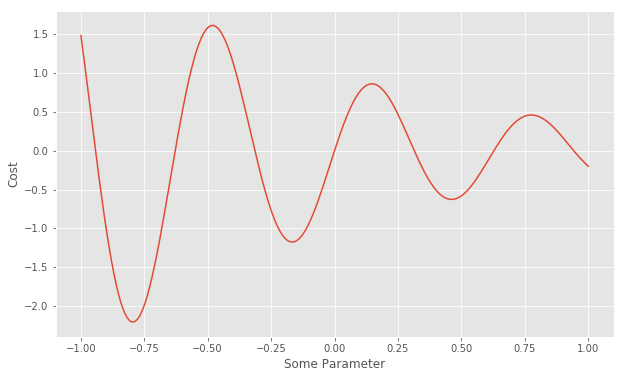

In [2]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')

In [3]:
gradient = np.diff(cost)

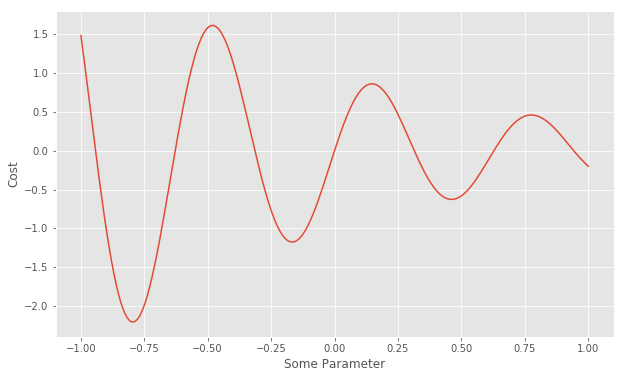

In [4]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')
n_iterations = 500
cmap = plt.get_cmap('coolwarm')
c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
init_p = np.random.randint(len(x)*0.2, len(x)*0.8)
learning_rate = 1.0
#for iter_i in range(n_iterations):
    #init_p -= learning_rate * gradient[init_p]
   # ax.plot(x[init_p], cost[init_p], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

Text(0.5, 0, 'Cost')

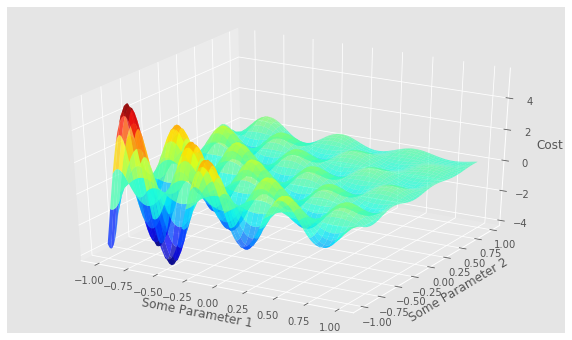

In [5]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x)*np.exp(-x)*np.cos(hz*y)*np.exp(-y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)
ax.set_xlabel('Some Parameter 1')
ax.set_ylabel('Some Parameter 2')
ax.set_zlabel('Cost')
# ax.axis('off')

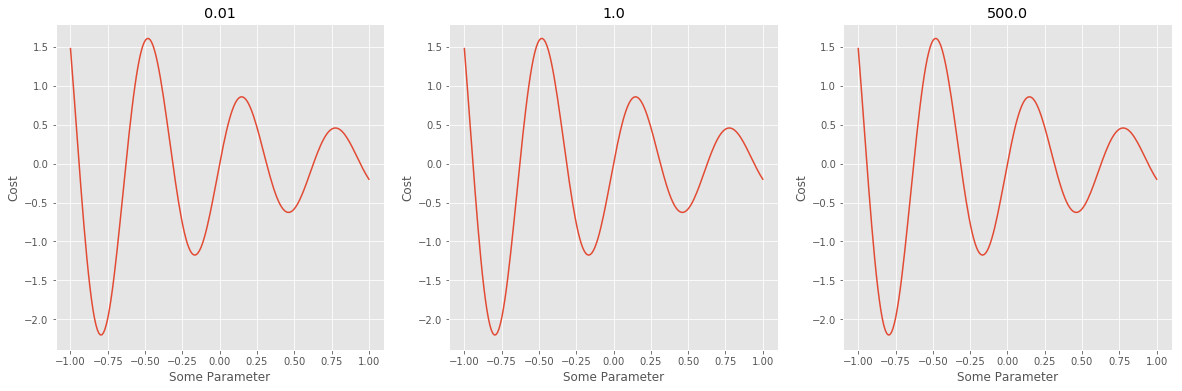

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
for rate_i, learning_rate in enumerate([0.01, 1.0, 500.0]):
    ax = axs[rate_i]
    x = np.linspace(-1, 1, 200)
    hz = 10
    cost = np.sin(hz*x)*np.exp(-x)
    ax.plot(x, cost)
    ax.set_ylabel('Cost')
    ax.set_xlabel('Some Parameter')
    ax.set_title(str(learning_rate))
    n_iterations = 500
    cmap = plt.get_cmap('coolwarm')
    c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
    scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
    init_p = 120#np.random.randint(len(x)*0.2, len(x)*0.8)
    #for iter_i in range(n_iterations):
       # init_p -= learning_rate * gradient[init_p]
       # ax.plot(x[init_p], cost[init_p], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

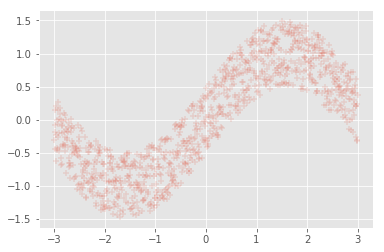

In [7]:
# toy data

n_observations = 1000

# Instead of having an image as input have values from -3 to 3.  This is going to be the input to network
xs = np.linspace(-3, 3, n_observations)

# From this input teach network to represent a function that looks like a sine wave
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+')

In [8]:
# values of the x-axis to a placeholder called X.
X = tf.placeholder(tf.float32, name='X')

#y values should be using another placeholder, y.
Y = tf.placeholder(tf.float32, name='Y')

(array([  4.,  19.,  55., 125., 214., 245., 191.,  97.,  36.,  14.]),
 array([-3.295821  , -2.6738865 , -2.0519521 , -1.4300178 , -0.8080834 ,
        -0.186149  ,  0.43578538,  1.0577198 ,  1.6796541 ,  2.3015885 ,
         2.923523  ], dtype=float32),
 <a list of 10 Patch objects>)

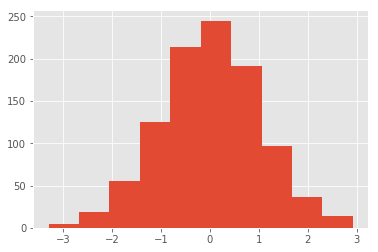

In [9]:
sess = tf.InteractiveSession()
n = tf.random_normal([1000]).eval()
plt.hist(n)

In [10]:
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')

Text(0.5, 20.200000000000003, 'Some Parameter')

(array([  5.,  40., 100., 181., 237., 241., 122.,  52.,  15.,   7.]),
 array([-0.29808974, -0.23455548, -0.17102122, -0.10748696, -0.0439527 ,
         0.01958156,  0.08311582,  0.14665008,  0.21018434,  0.2737186 ,
         0.33725286], dtype=float32),
 <a list of 10 Patch objects>)

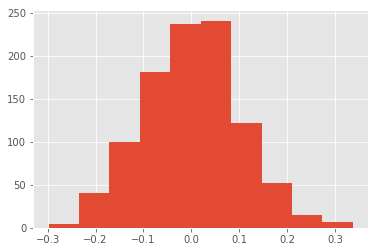

In [11]:
n = tf.random_normal([1000], stddev=0.1).eval()
plt.hist(n)

In [12]:

W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')


B = tf.Variable(tf.constant([0], dtype=tf.float32), name='bias')


Y_pred = X * W + B

In [13]:

def distance(p1, p2):
    return tf.abs(p1 - p2)

In [14]:
cost = distance(Y_pred, tf.sin(X))

In [15]:
cost = distance(Y_pred, Y)

In [16]:
cost = tf.reduce_mean(distance(Y_pred, Y))

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

/Users/gabrielshannon/anaconda3/envs/env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


0.70230675
0.54945266
0.4747169
0.44410717
0.429091
0.421713
0.41827193
0.41678008
0.41578755
0.415187
0.41487733
0.4147736
0.41475466


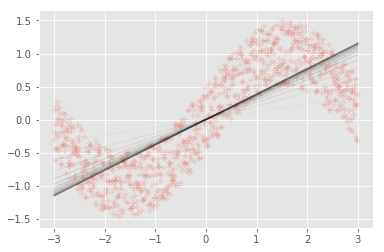

In [18]:
# create a session to use the graph
n_iterations = 500

# Plot true data distribution
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    # run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        # every 10 iterations
        if it_i % 10 == 0:
            # plot the x versus the predicted y
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)

            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            fig.show()
            plt.draw()

            print(training_cost)

        # Allow training to quit if reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break

        #track of the training cost
        prev_training_cost = training_cost

In [19]:
idxs = np.arange(100)
batch_size = 10
n_batches = len(idxs) // batch_size
for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [20]:
rand_idxs = np.random.permutation(idxs)
batch_size = 10
n_batches = len(rand_idxs) // batch_size
print('# of batches:', n_batches)
for batch_i in range(n_batches):
    print(rand_idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

# of batches: 10
[92 10 35 33 40 72 91 32 55 16]
[ 6 71 15  5 49 99 81 96 20 38]
[59 26 27 24 60  0 95 65 22  9]
[67 45 62 21  4 89 93 44 70 36]
[34 13 56 79 19 47 69 48 73 83]
[88  2  7 23 51 61 75 80 46  3]
[14 97 64 77 63 54 78 37 41 76]
[18 74 39 90 58 85 68 52 87 30]
[12 43 82 11 42 25 31 86 57 84]
[66 94 29 53 50 28 17  8  1 98]


0.62814504
0.5093481
0.4592048
0.43665767
0.42559186
0.41977552
0.41750374
0.41631672
0.41549683
0.41503063
0.4148254
0.41476274
0.41475147
0.41474822
0.414745
0.4147417
0.41473842
0.4147352
0.41473192
0.41473004
0.41472846
0.41472778
0.41472775
0.41472766
0.41472772
0.41472766
0.41472766
0.41472766
0.41472757
0.41472757
0.41472754
0.41472754
0.41472754
0.41472754
0.41472748
0.41472742
0.41472748
0.41472748
0.41472742
0.41472733
0.41472733
0.41472736
0.4147273
0.4147273
0.4147273
0.4147273
0.41472724
0.41472724
0.41472724
0.41472718


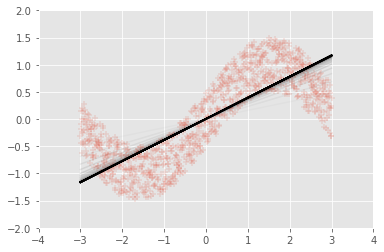

In [21]:
batch_size = 1000
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
ax.set_xlim([-4, 4])
ax.set_ylim([-2, 2])
with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    #run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        if it_i % 10 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            print(training_cost)
fig.show()
plt.draw()

In [22]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    with tf.Session() as sess:

        sess.run(tf.global_variables_initializer())

        # loop over epochs
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
    fig.show()
    plt.draw()

2.8996577
2.452145
2.5917633
2.45708
2.5168214
2.6106932
2.3543437
2.0859115
3.3672097
3.6955698


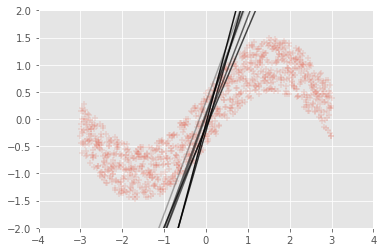

In [23]:
# multiply input by 100 values, creating an inner layer of 100 neurons.

n_neurons = 100
W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))

# allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

h = tf.matmul(tf.expand_dims(X, 1), W) + b

# operation to add every neuron's output
Y_pred = tf.reduce_sum(h, 1)

# Retrain with new Y_pred
train(X, Y, Y_pred)

0.99310625
0.4216019
0.41473725
0.41473308
0.41473424
0.4147366
0.41472867
0.4147368
0.41472757
0.41472822


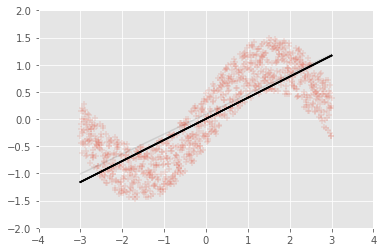

In [24]:
# create a polynomial function
# of different degrees. then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(0, 2):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

# retrain with new Y_pred
train(X, Y, Y_pred)

demonstrating the concept of global vs local minimun by demonstrating gradient decent into a local area of a graph
There are a few places where the graph could have ended up


0.72239625
0.44573778
0.29398364
0.5496189
0.6891682
0.4504682
0.4039423
0.58039016
0.39189625
0.51731455


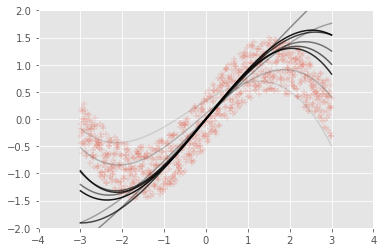

In [25]:
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(0, 4):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

train(X, Y, Y_pred)

4.5308194
3.7748275
1.6428657
3.2114263
2.8794007
0.8131904
5.0059032
2.419982
2.2987392
2.1697037


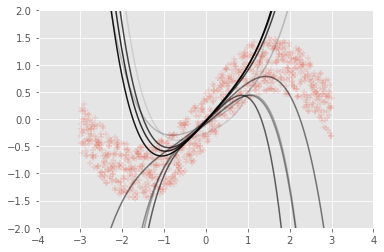

In [26]:
# Instead of a single factor and a bias, we'll create a polynomial function
# of different degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(0, 5):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

/Users/gabrielshannon/anaconda3/envs/env/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


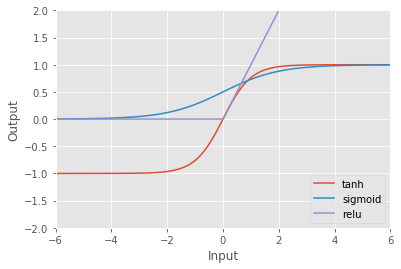

In [27]:
sess = tf.InteractiveSession()
x = np.linspace(-6,6,1000)
plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')

0.5402915
0.33979008
0.27684382
0.2626872
0.25977588
0.25893986
0.2584016
0.2590155
0.25780687
0.2578248


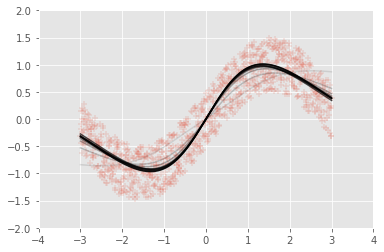

In [28]:
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name='W')

b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]), name='b')

h = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name='h')

Y_pred = tf.reduce_sum(h, 1)

train(X, Y, Y_pred)

In [29]:
def linear(X, n_input, n_output, activation=None):
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev=0.1), name='W')
    b = tf.Variable(
        tf.constant(0, dtype=tf.float32, shape=[n_output]), name='b')
    h = tf.nn.tanh(tf.matmul(X, W) + b, name='h')
    return h

In [30]:
# clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# get the current graph
g = tf.get_default_graph()

# names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# create new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10)

# See operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'h']

In [31]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

In [32]:
# clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# get the current graph
g = tf.get_default_graph()

# names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10, scope='layer1')

# See the names of any operations in graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add']

In [33]:
#Make network deeper
h2 = linear(h, 10, 10, scope='layer2')

h3 = linear(h2, 10, 3, scope='layer3')


[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add',
 'layer2/W/Initializer/random_normal/shape',
 'layer2/W/Initializer/random_normal/mean',
 'layer2/W/Initializer/random_normal/stddev',
 'layer2/W/Initializer/random_normal/RandomStandardNormal',
 'layer2/W/Initializer/random_normal/mul',
 'layer2/W/Initializer/random_normal',
 'layer2/W',
 'layer2/W/Assign',
 'layer2/W/read',
 'layer2/b/Initializer/Const',
 'layer2/b',
 'layer2/b/Assign',
 'layer2/b/read',
 'layer2/MatMul',
 'layer2/add',
 'layer3/W/Initializer/random_normal/shape',
 'layer3/W/Initializer/random_normal/mean',
 'layer3/W/Initiali

/Users/gabrielshannon/anaconda3/envs/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until


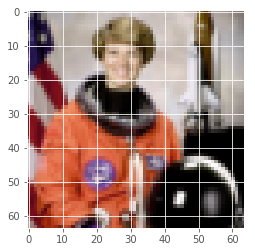

In [34]:
from skimage.data import astronaut
from scipy.misc import imresize
img = imresize(astronaut(), (64, 64))
plt.imshow(img)

Learning rate, how far along the parameter the gradient search will move

In [35]:
# collect all the positions in the image in our list, xs
xs = []

# corresponding colors for each of these positions
ys = []

# loop over the image
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        # store the inputs
        xs.append([row_i, col_i])
        # And outputs that the network needs to learn to predict
        ys.append(img[row_i, col_i])

# convert lists to arrays
xs = np.array(xs)
ys = np.array(ys)

# Normalizing input by the mean and standard deviation
xs = (xs - np.mean(xs)) / np.std(xs)

# print the shapes
xs.shape, ys.shape

((4096, 2), (4096, 3))

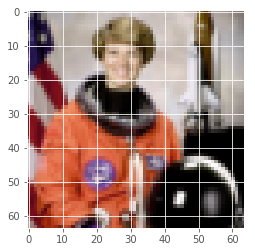

In [36]:
plt.imshow(ys.reshape(img.shape))

In [37]:
X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')

In [38]:
n_neurons = [2, 64, 64, 64, 64, 64, 64, 3]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

noisy function used with toy data in attempt to detect the overall motivation behind a function. Regression, predicting some continous output given some continous input value

In [39]:
cost = tf.reduce_mean(
    tf.reduce_sum(distance(Y_pred, Y), 1))

In [40]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

0 171.10779
1 162.93109
2 154.398
3 148.12369
4 145.70563
5 141.22525
6 141.10388
7 135.14342
8 130.28773
9 131.5705
10 120.27709
11 115.04283
12 106.40282
13 104.29817
14 100.60122
15 102.32042
16 101.59099
17 98.36972
18 96.86742
19 98.13284


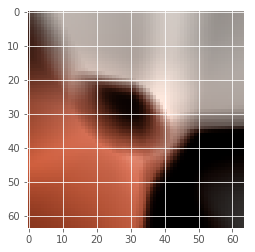

20 101.33587
21 96.9985
22 96.39251
23 94.8695
24 94.08057
25 95.53331
26 95.74716
27 94.87282
28 93.2343
29 95.036446
30 94.57469
31 93.54454
32 91.74634
33 92.32978
34 95.18457
35 91.3408
36 92.69004
37 90.64043
38 90.39057
39 90.94624


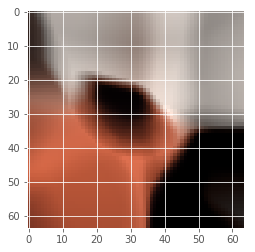

40 89.47132
41 94.01637
42 88.8877
43 88.27672
44 89.573654
45 88.44446
46 88.981064
47 87.81195
48 88.08519
49 87.717064
50 91.25798
51 87.78255
52 92.19803
53 86.8595
54 84.301506
55 89.592545
56 88.18829
57 86.564545
58 85.52917
59 83.74182


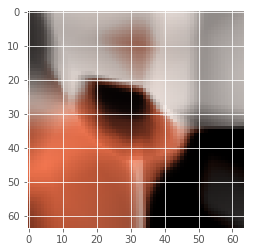

60 82.75645
61 82.08513
62 85.172134
63 82.227356
64 81.865616
65 84.46282
66 81.09356
67 84.77072
68 81.69924
69 83.28685
70 86.632324
71 80.60507
72 81.292175
73 82.08652
74 84.50171
75 79.18747
76 80.39393
77 77.74576
78 79.528534
79 78.68884


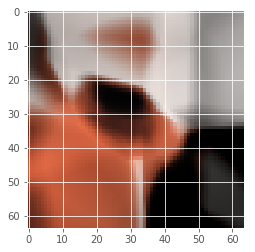

80 79.98683
81 77.84733
82 79.02498
83 78.05712
84 77.03613
85 75.76843
86 78.72516
87 76.655685
88 75.792755
89 80.86748
90 74.83339
91 76.026764
92 77.16997
93 76.25925
94 76.22131
95 73.650925
96 77.24156
97 74.69838
98 73.059616
99 75.99569


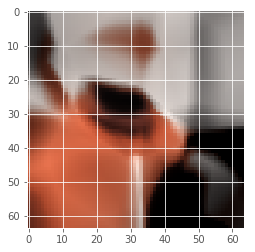

100 74.86949
101 73.77643
102 74.98388
103 77.203026
104 74.22863
105 71.249435
106 72.952225
107 73.1866
108 69.31926
109 69.10767
110 71.70615
111 67.4928
112 66.96655
113 70.13077
114 68.41949
115 74.1026
116 70.08606
117 67.9318
118 66.965996
119 66.06326


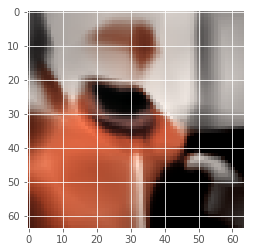

120 73.17525
121 70.15385
122 68.70052
123 66.442795
124 69.82979
125 65.829895
126 68.19089
127 61.958637
128 62.409576
129 68.89693
130 63.884598
131 60.66639
132 60.527622
133 63.334713
134 62.745434
135 63.89019
136 60.977978
137 61.50006
138 57.67006
139 60.74999


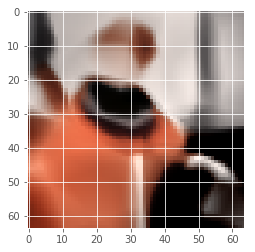

140 62.11808
141 63.10188
142 58.00753
143 58.20327
144 58.655228
145 61.207565
146 58.528004
147 63.314552
148 56.448956
149 58.26921
150 55.703957
151 56.01748
152 58.969902
153 58.563774
154 60.4325
155 61.612976
156 57.133156
157 56.662918
158 57.111294
159 53.696274


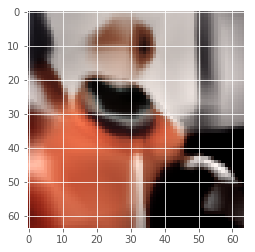

160 57.820675
161 54.600895
162 57.16851
163 59.42148
164 52.690804
165 55.87199
166 56.867058
167 54.957527
168 59.64215
169 58.33689
170 55.639038
171 55.09106
172 54.08889
173 55.301266
174 53.646553
175 53.80591
176 52.506798
177 54.52974
178 54.8649
179 52.390182


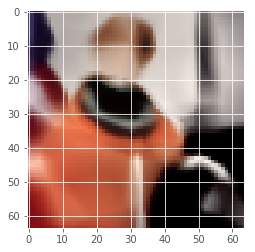

180 53.1691
181 55.65731
182 58.281403
183 54.91501
184 56.905388
185 53.33947
186 54.10595
187 55.011627
188 53.365406
189 51.70543
190 51.070045
191 54.80533
192 52.660286
193 54.825268
194 51.235985
195 52.528297
196 53.379707
197 54.062447
198 49.393345
199 56.854668


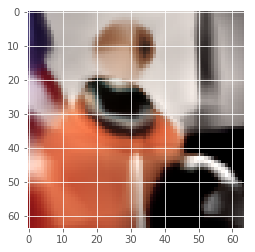

200 51.80571
201 50.98368
202 50.989075
203 53.877686
204 52.2179
205 53.68494
206 49.318752
207 50.074245
208 50.436317
209 50.587532
210 49.671654
211 52.30508
212 51.838314
213 50.545937
214 48.976524
215 54.888992
216 48.726257
217 48.57421
218 53.371933
219 54.041306


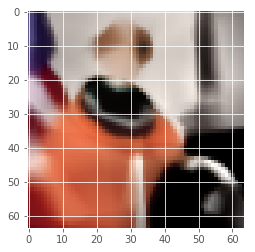

220 52.002613
221 49.86262
222 52.40783
223 51.401382
224 51.10929
225 49.03762
226 48.704933
227 51.39033
228 52.882217
229 51.283672
230 49.85086
231 53.488457
232 51.869766
233 50.390076
234 52.666443
235 48.680115
236 48.34564
237 47.988506
238 49.196087
239 47.880695


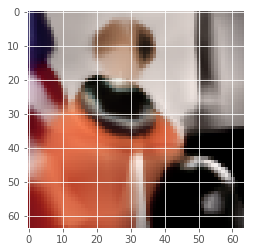

240 49.619034
241 48.43922
242 49.85474
243 49.525444
244 51.29283
245 47.629242
246 51.227715
247 51.25666
248 49.07621
249 48.481884
250 49.50304
251 49.903023
252 51.98223
253 47.116184
254 52.519337
255 59.475685
256 50.16326
257 43.9764
258 48.313858
259 50.268837


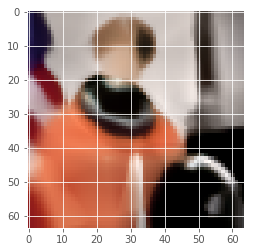

260 48.079636
261 50.22532
262 50.144753
263 50.709904
264 49.034058
265 48.88343
266 48.80362
267 45.244003
268 44.73039
269 50.21419
270 48.28894
271 45.46727
272 46.190666
273 48.58915
274 46.31276
275 47.427044
276 46.08657
277 45.939293
278 46.411842
279 47.693142


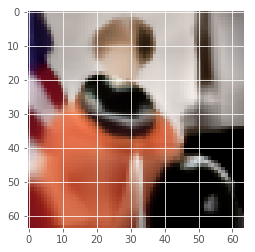

280 47.525124
281 48.557964
282 49.736366
283 46.480988
284 47.37932
285 46.969147
286 45.813908
287 46.048134
288 45.029526
289 46.666435
290 44.51971
291 44.700485
292 48.2713
293 44.40743
294 44.472393
295 43.378124
296 43.01906
297 44.19117
298 43.538525
299 43.61787


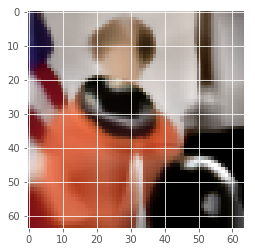

300 45.511677
301 47.99696
302 44.86044
303 48.09337
304 48.481617
305 43.317177
306 48.48429
307 44.159344
308 45.76278
309 43.530815
310 48.810104
311 43.012337
312 46.94964
313 50.366333
314 45.465828
315 43.563267
316 42.9661
317 45.263336
318 44.755074
319 45.99558


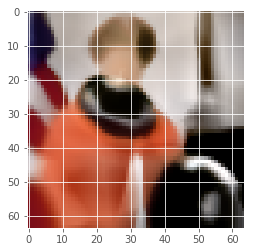

320 45.616795
321 45.464283
322 43.154514
323 43.805023
324 42.546974
325 43.18089
326 42.58264
327 42.745247
328 45.60961
329 46.086647
330 42.58369
331 43.99872
332 44.784912
333 43.069298
334 44.15863
335 41.50937
336 40.691013
337 41.894897
338 42.891983
339 43.13339


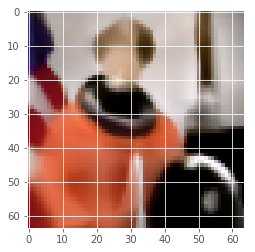

340 45.547424
341 41.03901
342 41.647163
343 41.27618
344 43.28502
345 42.68479
346 40.960484
347 40.403255
348 43.533913
349 42.465878
350 41.61316
351 43.425407
352 41.478077
353 42.53817
354 42.634037
355 43.490746
356 43.298798
357 41.35454
358 43.763805
359 47.609116


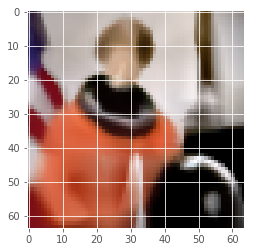

360 41.345985
361 40.983444
362 41.35857
363 42.341476
364 43.33739
365 44.009415
366 42.06183
367 45.229614
368 42.589302
369 44.997093
370 42.029915
371 44.005592
372 42.115356
373 44.155518
374 40.43794
375 41.453896
376 42.68386
377 42.25234
378 43.263546
379 44.43821


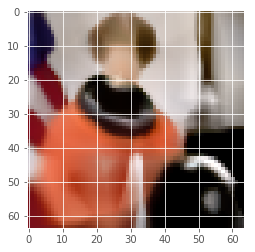

380 41.807175
381 44.05278
382 41.20728
383 42.221024
384 45.25428
385 44.10277
386 41.281578
387 42.570427
388 41.22612
389 42.208813
390 40.22783
391 42.38286
392 39.77757
393 42.73001
394 41.50535
395 39.317886
396 39.95427
397 40.54522
398 40.2194
399 42.801094


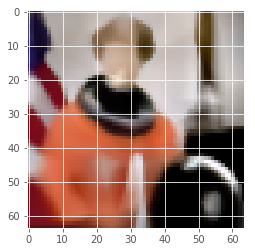

400 41.575718
401 38.925964
402 39.870827
403 37.576874
404 40.415016
405 39.023315
406 40.705673
407 39.884483
408 38.936348
409 38.354313
410 39.14734
411 41.00154
412 38.90236
413 43.455963
414 37.193752
415 45.380753
416 38.84442
417 38.255577
418 37.710037
419 46.054867


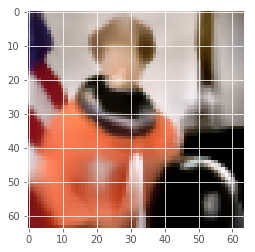

420 39.61599
421 38.029663
422 39.151592
423 44.56752
424 38.12032
425 42.887413
426 41.245472
427 41.277153
428 39.42771
429 41.365112
430 37.827065
431 40.055954
432 39.574505
433 36.571392
434 36.7678
435 41.968575
436 39.86582
437 36.904198
438 39.316605
439 38.794205


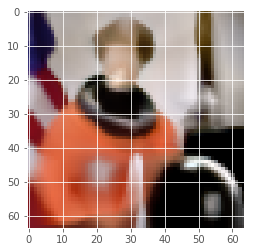

440 38.75714
441 38.419975
442 39.8655
443 37.86863
444 38.156918
445 38.629303
446 41.170494
447 42.164474
448 39.24027
449 42.53197
450 38.507675
451 38.012222
452 37.636578
453 37.894997
454 39.98826
455 39.548706
456 37.735764
457 36.697807
458 37.487747
459 38.733177


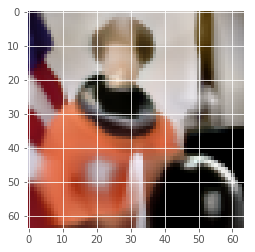

460 39.450996
461 40.51112
462 40.50386
463 38.371593
464 41.166992
465 37.599747
466 38.409058
467 37.358635
468 38.8649
469 38.75851
470 38.584335
471 37.294693
472 37.79433
473 37.968876
474 36.685066
475 37.20266
476 36.481583
477 37.129757
478 38.936653
479 38.791763


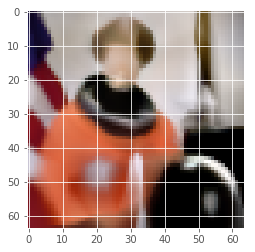

480 35.69613
481 39.1187
482 35.50001
483 37.63611
484 37.49523
485 42.07095
486 39.287735
487 41.269222
488 37.009293
489 38.419228
490 38.209267
491 37.45153
492 40.886005
493 39.851517
494 38.372517
495 36.468086
496 36.35225
497 35.18979
498 38.05948
499 35.364334


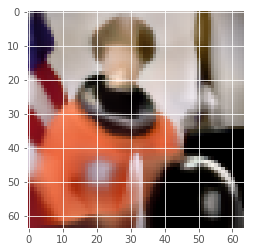

In [41]:
n_iterations = 500
batch_size = 50
with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    # run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)

        if (it_i + 1) % 20 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img)
            plt.show()

Ensure that the values are closer to 0

Telling the optimizer to minimize the cost varible which measures the difference between tbe predicted and the actual y value. Optimizer calculated the negative gradient for us